In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
hr_df=pd.read_csv('C:\\capstonefile\\train_hr.csv')

### Explore data

In [3]:
print('Shape of hr data ' ,hr_df.shape)

Shape of hr data  (54808, 14)


There are 54808 rows and 14 column(feature)  in the data set

In [4]:
#First five rows of the  data frame
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# Columns in  data set
print (hr_df.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [6]:
# Statistics
hr_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


The distribution of data for feature no_of_trainings, age, length_of_service, avg_training_score looks normal (mean & median are close enough) so we can say there is no outlier present in dataset.

In [7]:
#Statistics for categorical colmn
hr_df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Majority in department is Sales & Marketing with frequency 16840. 
majority in region is region_2 with frequency 12343. 
majority in education is Bachelor's with frequency 36669. 
majority in gender is male with frequency 38496. 
majority in recruitment_channel is other with frequency 30446. 

In [8]:
# Check null values
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

There are 2 columns that have a missing(NAN) value (education and previous_year_rating)

In [9]:
# See amount of target variable
hr_df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
print('1. The percentage of employees who have not received a promotion are ' + str(round((50140/54808)*100,2)) + '%')
print('2. The percentage of employees who get promoted are ' + str(round((4668/54808)*100,2)) + '%')

1. The percentage of employees who have not received a promotion are 91.48%
2. The percentage of employees who get promoted are 8.52%


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

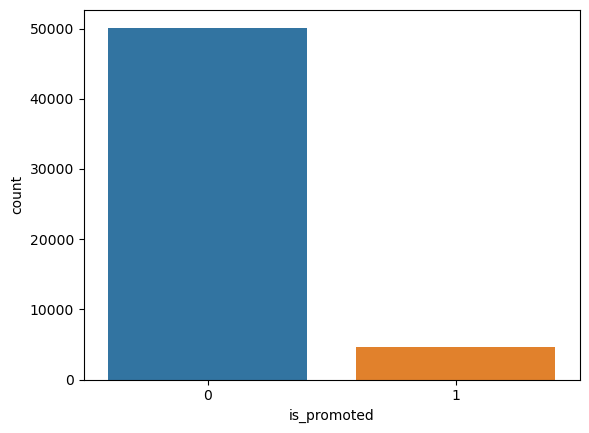

In [11]:
sns.countplot(x="is_promoted", data=hr_df)

In [12]:
#Unique variable in each column
data_unique = hr_df.nunique().reset_index()
data_unique.columns = ['feature', 'unique value']
data_unique = data_unique.sort_values('unique value', ascending=False).reset_index(drop=True)
data_unique

,feature,unique value
0,employee_id,54808
1,avg_training_score,61
2,age,41
3,length_of_service,35
4,region,34
5,no_of_trainings,10
6,department,9
7,previous_year_rating,5
8,education,3
9,recruitment_channel,3


In [13]:
#Information of data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


in this data set  5 categogiral column, and 9 numerical colummn

In [14]:
#check for duplicate values
hr_df[hr_df.duplicated()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


There is no diplicate rows in dataset

## EDA

<AxesSubplot:xlabel='age', ylabel='Density'>

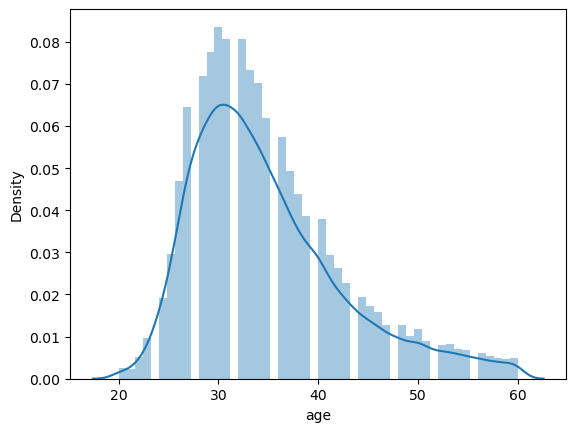

In [15]:
#distribbution of age
sns.distplot(hr_df['age'])

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

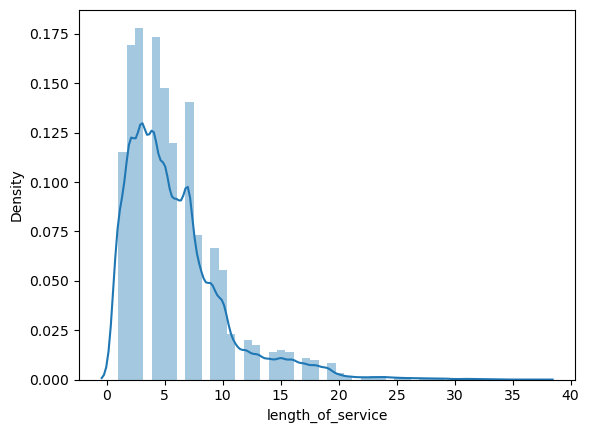

In [16]:
#distribution of lebgth of service
sns.distplot(hr_df['length_of_service'])

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

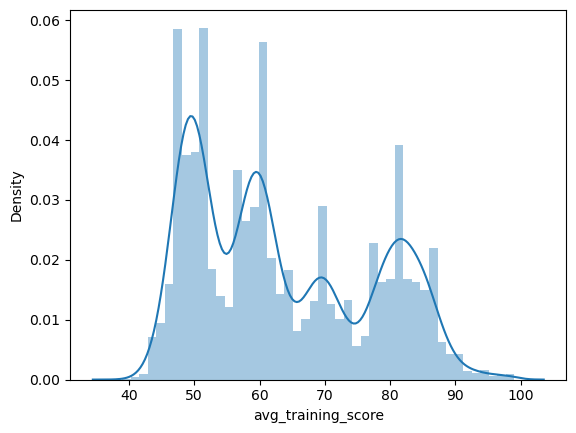

In [17]:
#distribution of training score
sns.distplot(hr_df['avg_training_score'])

In [18]:
#Promotion % in each department
group_dep =hr_df.groupby(['department', 'is_promoted']).size().unstack()
dep_promo= group_dep.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
dep_promo

is_promoted,0,1
department,,
Technology,89.240684,10.759316
Procurement,90.361446,9.638554
Analytics,90.433483,9.566517
Operations,90.985196,9.014804
Finance,91.876972,8.123028


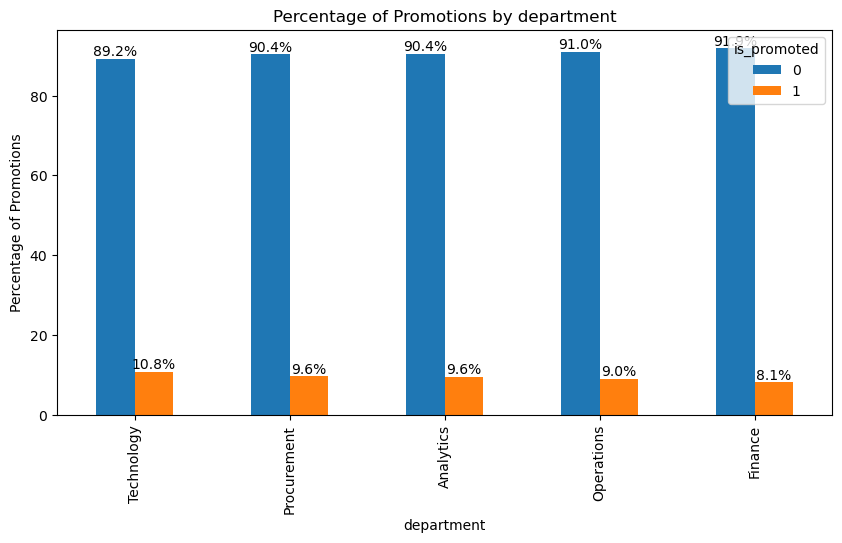

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

dep_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by department')
ax.set_xlabel('department')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [20]:
#Promotion % in each education
group_edu =hr_df.groupby(['education', 'is_promoted']).size().unstack()
edu_promo= group_edu.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
edu_promo

is_promoted,0,1
education,,
Master's & above,90.144054,9.855946
Below Secondary,91.677019,8.322981
Bachelor's,91.796886,8.203114


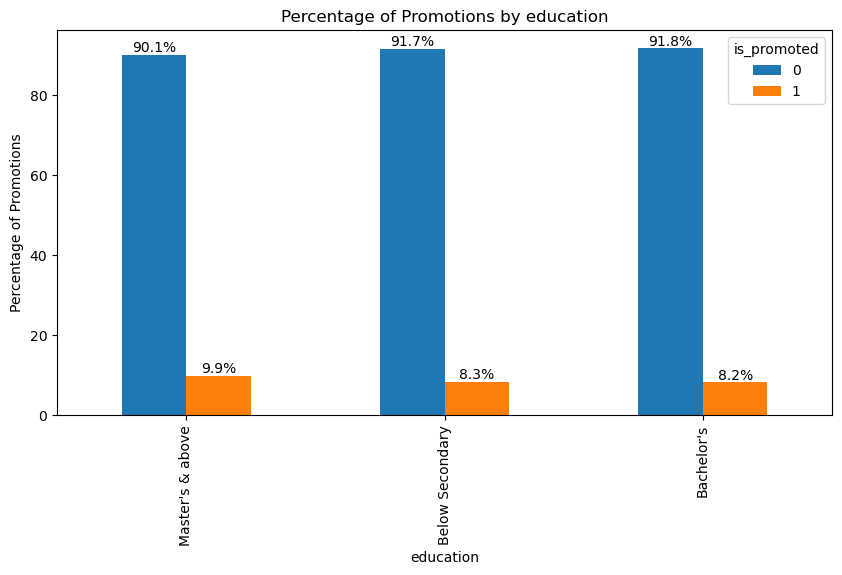

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

edu_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by education')
ax.set_xlabel('education')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [22]:
#Promotion % in each recruitment
group_rec =hr_df.groupby(['recruitment_channel', 'is_promoted']).size().unstack()
rec_promo= group_rec.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
rec_promo

is_promoted,0,1
recruitment_channel,,
referred,87.915937,12.084063
sourcing,91.498708,8.501292
other,91.604809,8.395191


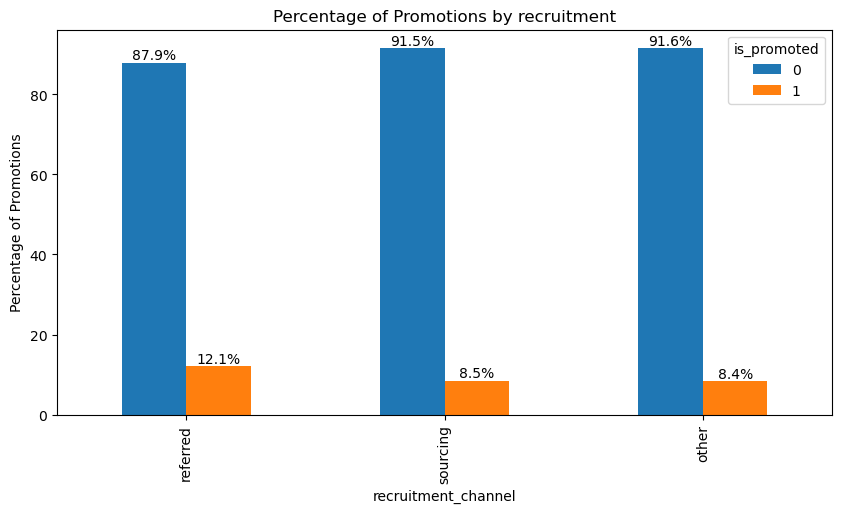

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

rec_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by recruitment')
ax.set_xlabel('recruitment_channel')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [24]:
#Promotion % by no of training
group_tri =hr_df.groupby(['no_of_trainings', 'is_promoted']).size().unstack()
tri_promo= group_tri.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
tri_promo

is_promoted,0,1
no_of_trainings,,
1,91.189328,8.810672
2,92.425191,7.574809
3,93.130631,6.869369
4,94.444444,5.555556
6,95.454545,4.545455


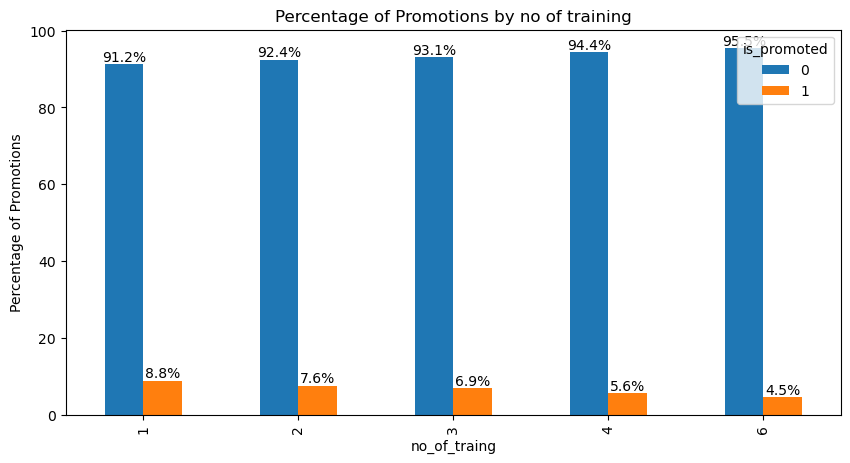

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

tri_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by no of training')
ax.set_xlabel('no_of_traing')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [26]:
#Promotion % by no of training
group_rat =hr_df.groupby(['previous_year_rating', 'is_promoted']).size().unstack()
rat_promo= group_rat.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
rat_promo

is_promoted,0,1
previous_year_rating,,
5.0,83.638532,16.361468
4.0,92.062367,7.937633
3.0,92.722097,7.277903
2.0,95.715976,4.284024
1.0,98.585891,1.414109


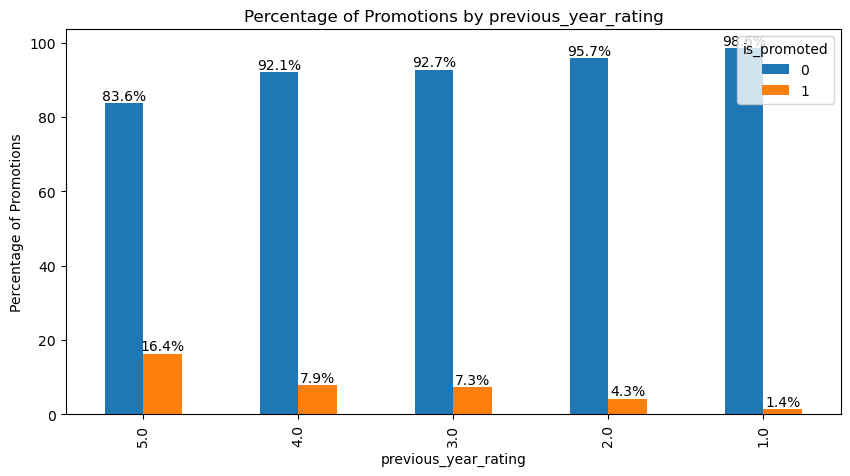

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

rat_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by previous_year_rating')
ax.set_xlabel('previous_year_rating')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [28]:
#Promotion % by no of lenth of service
group_los =hr_df.groupby(['length_of_service', 'is_promoted']).size().unstack()
los_promo= group_los.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
los_promo

is_promoted,0,1
length_of_service,,
34,75.000000,25.000000
32,80.000000,20.000000
23,89.230769,10.769231
11,89.519651,10.480349
29,90.000000,10.000000


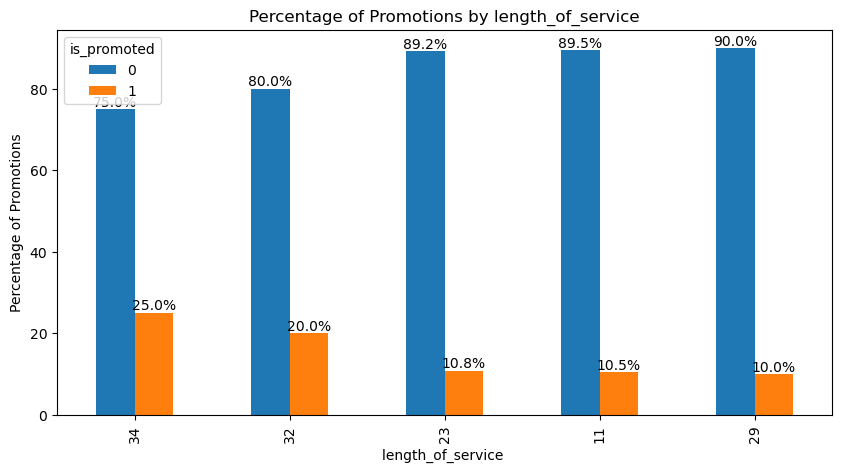

In [29]:
ig, ax = plt.subplots(figsize=(10, 5))

los_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by length_of_service')
ax.set_xlabel('length_of_service ')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()      

In [30]:
#Promotion % by KPI >80%
group_kpi =hr_df.groupby(['KPIs_met >80%', 'is_promoted']).size().unstack()
kpi_promo= group_kpi.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
kpi_promo

is_promoted,0,1
KPIs_met >80%,,
1,83.090560,16.909440
0,96.041332,3.958668


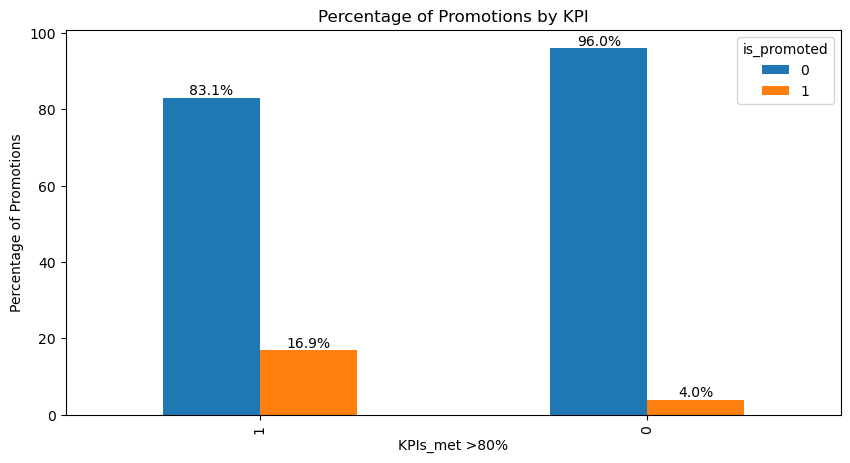

In [31]:
ig, ax = plt.subplots(figsize=(10, 5))

kpi_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by KPI')
ax.set_xlabel('KPIs_met >80%')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

In [32]:
#Promotion % by award won
group_awd =hr_df.groupby(['awards_won?', 'is_promoted']).size().unstack()
awd_promo= group_awd.apply(lambda x: 100 * x / float(x.sum()), axis=1).sort_values(by=1,ascending=False).head()
awd_promo

is_promoted,0,1
awards_won?,,
1,55.984252,44.015748
0,92.325078,7.674922


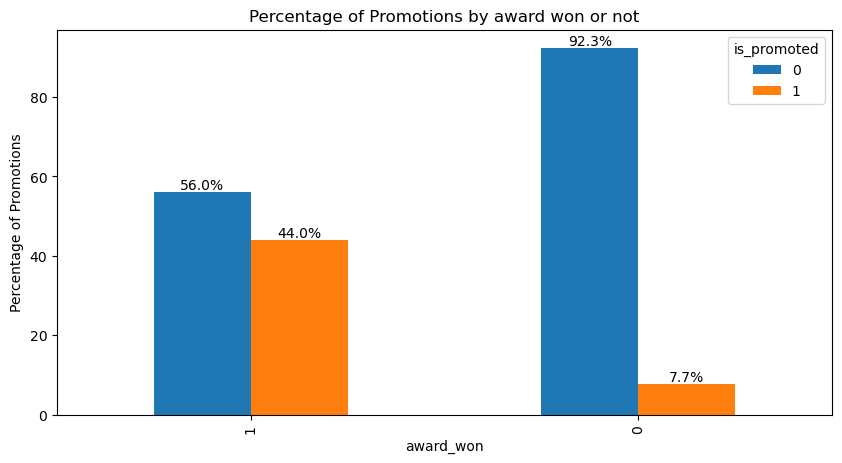

In [33]:
ig, ax = plt.subplots(figsize=(10, 5))

awd_promo.plot(kind='bar', ax=ax)

ax.set_title('Percentage of Promotions by award won or not')
ax.set_xlabel('award_won')
ax.set_ylabel('Percentage of Promotions')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues])

plt.show()

If employee work 34 years is 34% chances to promot.
employee's KPI greater than 80% is16.9% chances to promot.
employee won any award is 44% chances to get promotion
employee's previous_year_rating=5  is 16% chances to get promotion

In [34]:
#Promotion % by emploee's training score  greater than 90
df_filtered = hr_df[hr_df['avg_training_score'] > 90]
total = len(df_filtered)
promoted = len(df_filtered[df_filtered['is_promoted'] == 1])
percentage_promoted = (promoted / total) * 100

In [35]:
print('employees training score above 90 is ',str(round(percentage_promoted,2)),'% chances to promote.')

employees training score above 90 is  87.74 % chances to promote.


In [36]:
# Promotion % by training score and  kpi
hr_df['Ts > 90'] = np.where(hr_df['avg_training_score']>90, 1, 0)
prob_tk =hr_df.groupby(['Ts > 90','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
training_kpi = prob_tk.pivot_table(index=['Ts > 90','KPIs_met >80%'], columns='is_promoted',values='employee_id').reset_index()
training_kpi.columns = ['Ts > 90%', 'kpi', 'not_promoted','promoted']
training_kpi['total'] = training_kpi['not_promoted']+training_kpi['promoted']
training_kpi['probability'] = round((training_kpi['promoted']/training_kpi['total'])*100,2)
training_kpi['kpi'] = np.where(training_kpi['kpi']==0, '<80%', '>80%')
training_kpi

,Ts > 90%,kpi,not_promoted,promoted,total,probability
0,0,<80%,34064,1231,35295,3.49
1,0,>80%,16005,2929,18934,15.47
2,1,<80%,47,175,222,78.83
3,1,>80%,24,333,357,93.28


In [37]:
hr_df.drop(['Ts > 90'],axis=1,inplace=True)

Employees who have an average training score of more than 90 and KPI is greater than 80% is 93% chancecs of being promoted. 

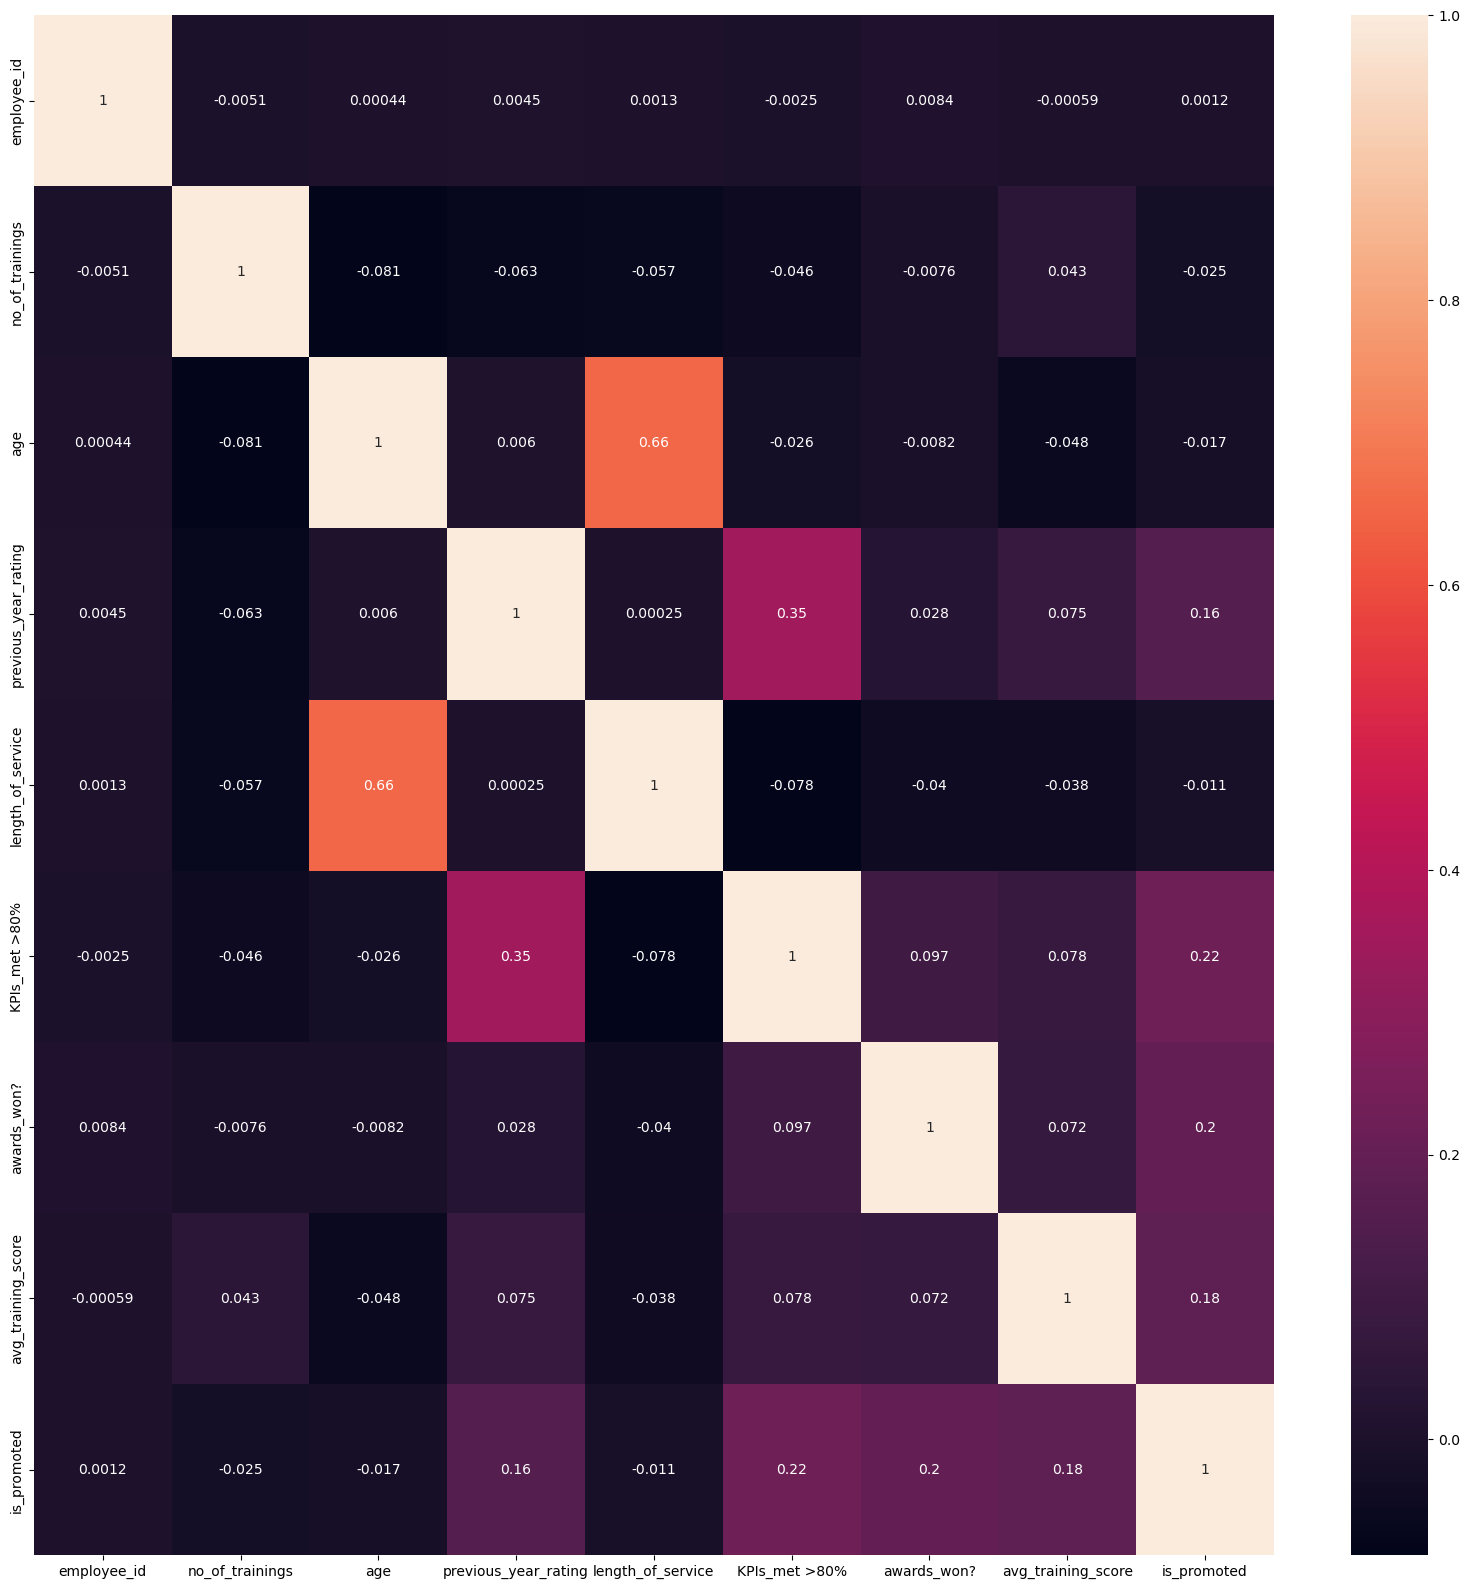

In [38]:
#Heatmap to show co relation 
cormat=hr_df.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(hr_df[top_corr_feature].corr(),annot=True)

Handling missing values

In [39]:
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [40]:
hr_df['education']=hr_df['education'].fillna(hr_df['education'].mode()[0])

In [41]:
hr_df['previous_year_rating']=hr_df['previous_year_rating'].fillna(hr_df['previous_year_rating'].mode()[0]).astype(int)

In [42]:
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


One hot encoding

In [43]:
hr_final=pd.get_dummies(hr_df,columns=['department','education','recruitment_channel','gender'],drop_first=True)

In [44]:
hr_final.shape

(54808, 23)

In [45]:
hr_final.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing,gender_m
0,65438,region_7,1,35,5,8,1,0,49,0,...,0,0,0,1,0,0,1,0,1,0
1,65141,region_22,1,30,5,4,0,0,60,0,...,1,0,0,0,0,0,0,0,0,1
2,7513,region_19,1,34,3,7,0,0,50,0,...,0,0,0,1,0,0,0,0,1,1
3,2542,region_23,2,39,1,10,0,0,50,0,...,0,0,0,1,0,0,0,0,0,1
4,48945,region_26,1,45,3,2,0,0,73,0,...,0,0,0,0,1,0,0,0,0,1


region is not important as much to make a model so we can drop it

In [46]:
#Drop employee_id and region column
hr_final.drop(['employee_id','region'],axis=1,inplace=True)

#### Spliting data into train test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x=hr_final.drop('is_promoted',axis=1)
y=hr_final['is_promoted']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [50]:
print('Shape of x train ' ,x_train.shape)
print('Shape of y train ' ,y_train.shape)
print('Shape of x test ' ,x_test.shape)
print('Shape of y test  ' ,y_test.shape)

Shape of x train  (38365, 20)
Shape of y train  (38365,)
Shape of x test  (16443, 20)
Shape of y test   (16443,)


## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [52]:
log_reg = LogisticRegression()

In [53]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred_lr=log_reg.predict(x_test)

In [55]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
print('train score : ',str(round(log_reg.score(x_train,y_train)*100,2)), '%')

train score :  92.08 %


In [57]:
print('test score : ',str(round(log_reg.score(x_test,y_test)*100,2)), '%' )

test score :  92.13 %


In [58]:
confusion_matrix(y_test,y_pred_lr)

array([[14956,   108],
       [ 1186,   193]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred_lr))
print('F1-Score ',str(round(f1_score(y_test, y_pred_lr)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15064
           1       0.64      0.14      0.23      1379

    accuracy                           0.92     16443
   macro avg       0.78      0.57      0.59     16443
weighted avg       0.90      0.92      0.90     16443

F1-Score  23.0 %


In [60]:
y_predicted_proba = log_reg.predict_proba(x_test)
y_predicted_proba

array([[0.99632543, 0.00367457],
       [0.99393183, 0.00606817],
       [0.97086396, 0.02913604],
       ...,
       [0.97156984, 0.02843016],
       [0.94976759, 0.05023241],
       [0.9734446 , 0.0265554 ]])

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [62]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [63]:
y_pred_rf=rfc.predict(x_test)

In [64]:
print('train score : ',str(round(rfc.score(x_train,y_train)*100,2)), '%')

train score :  92.41 %


In [65]:
print('test score : ',str(round(rfc.score(x_test,y_test)*100,2)), '%')

test score :  92.43 %


In [66]:
confusion_matrix(y_test,y_pred_rf)

array([[15049,    15],
       [ 1230,   149]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred_rf))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_rf)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.91      0.11      0.19      1379

    accuracy                           0.92     16443
   macro avg       0.92      0.55      0.58     16443
weighted avg       0.92      0.92      0.90     16443

F1-Score =  19.3 %


## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [69]:
dtc=DecisionTreeClassifier(max_depth=3)

In [70]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[6] <= 90.5\ngini = 0.157\nsamples = 38365\nvalue = [35076, 3289]'),
 Text(0.25, 0.625, 'X[4] <= 0.5\ngini = 0.142\nsamples = 37960\nvalue = [35037, 2923]'),
 Text(0.125, 0.375, 'X[5] <= 0.5\ngini = 0.067\nsamples = 24745\nvalue = [23881, 864]'),
 Text(0.0625, 0.125, 'gini = 0.058\nsamples = 24474\nvalue = [23748, 726]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 271\nvalue = [133, 138]'),
 Text(0.375, 0.375, 'X[6] <= 88.5\ngini = 0.263\nsamples = 13215\nvalue = [11156, 2059]'),
 Text(0.3125, 0.125, 'gini = 0.259\nsamples = 13066\nvalue = [11072, 1994]'),
 Text(0.4375, 0.125, 'gini = 0.492\nsamples = 149\nvalue = [84, 65]'),
 Text(0.75, 0.625, 'X[6] <= 93.5\ngini = 0.174\nsamples = 405\nvalue = [39, 366]'),
 Text(0.625, 0.375, 'X[12] <= 0.5\ngini = 0.298\nsamples = 203\nvalue = [37, 166]'),
 Text(0.5625, 0.125, 'gini = 0.259\nsamples = 196\nvalue = [30, 166]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.875, 0.375, 'X[6] <= 94.5\ngini

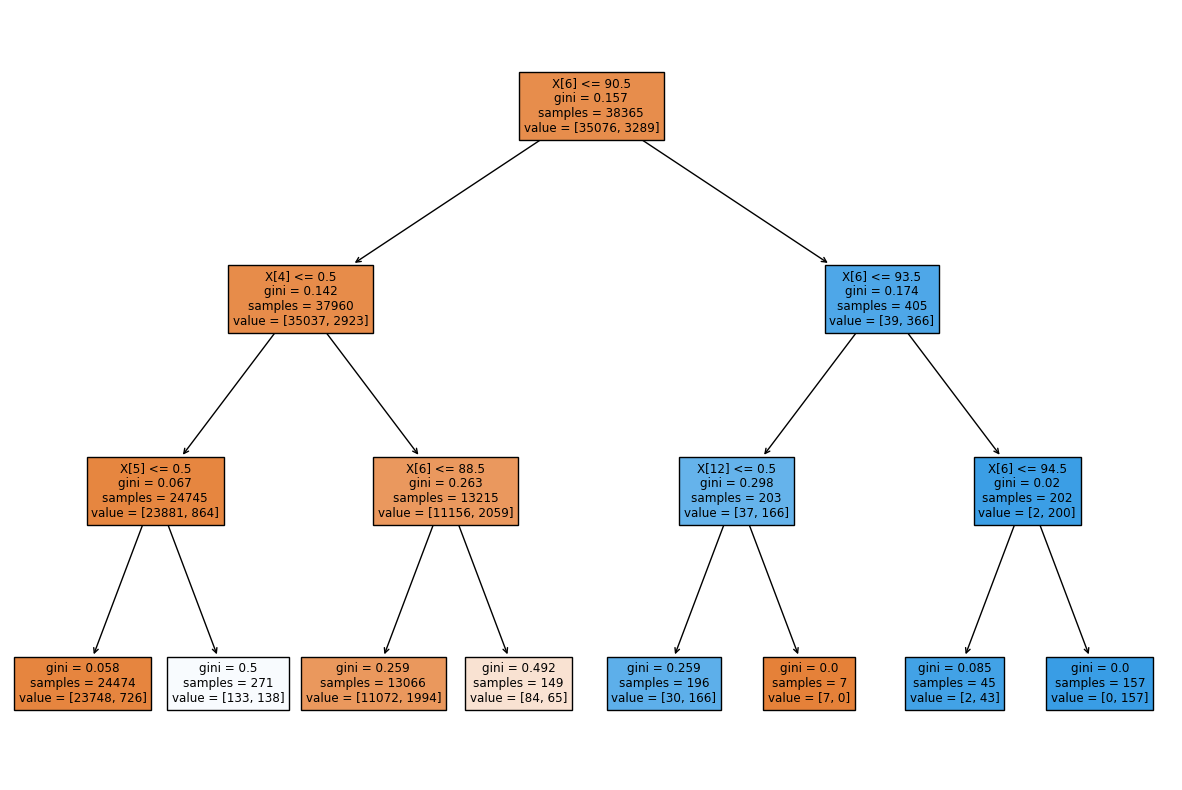

In [71]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [72]:
y_pred_dt=dtc.predict(x_test)

In [73]:
print('train score : ',str(round(dtc.score(x_train,y_train)*100,2)) , '%')

train score :  92.31 %


In [74]:
print('test score : ' ,str(round(dtc.score(x_test,y_test)*100,2)) ,'%')

test score :  92.2 %


In [75]:
confusion_matrix(y_test,y_pred_dt)

array([[14970,    94],
       [ 1189,   190]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred_dt))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_dt)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15064
           1       0.67      0.14      0.23      1379

    accuracy                           0.92     16443
   macro avg       0.80      0.57      0.59     16443
weighted avg       0.90      0.92      0.90     16443

F1-Score =  22.9 %


tuning in Decision tree

In [77]:
parameter_dt={
           'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto','sqrt','log2']
}

In [78]:
dtcv=DecisionTreeClassifier()

In [79]:
cv_dt=GridSearchCV(dtcv,param_grid=parameter_dt,cv=5,scoring='accuracy')

In [80]:
cv_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [81]:
cv_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [82]:
y_pred_dtcv=cv_dt.predict(x_test)
y_pred_dtcv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
print('train score : ',str(round(cv_dt.score(x_train,y_train)*100,2)) , '%')

train score :  91.92 %


In [84]:
print('test score : ' ,str(round(cv_dt.score(x_test,y_test)*100,2)) ,'%')

test score :  91.92 %


In [85]:
confusion_matrix(y_test,y_pred_dtcv)

array([[15037,    27],
       [ 1301,    78]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred_dtcv))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_dtcv)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.74      0.06      0.11      1379

    accuracy                           0.92     16443
   macro avg       0.83      0.53      0.53     16443
weighted avg       0.91      0.92      0.89     16443

F1-Score =  10.5 %


## K-Nearest Neighbors 

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier()

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
y_pred_knn=knn.predict(x_test)

In [91]:
print('train score : ',str(round(knn.score(x_train,y_train)*100,2)), '%')

train score :  93.03 %


In [92]:
print('test score : ',str(round(knn.score(x_test,y_test)*100,2)) , '%')

test score :  92.28 %


In [93]:
confusion_matrix(y_test,y_pred_knn)

array([[14980,    84],
       [ 1185,   194]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred_knn))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_knn)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15064
           1       0.70      0.14      0.23      1379

    accuracy                           0.92     16443
   macro avg       0.81      0.57      0.60     16443
weighted avg       0.91      0.92      0.90     16443

F1-Score =  23.4 %


Tuning in K-Nearest Neighbors 

In [95]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [96]:
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)

In [97]:
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [98]:
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [99]:
y_pred_kncv=grid_search_knn.predict(x_test)

In [100]:
print ('train score after tuning : ',str(round(grid_search_knn.score(x_train,y_train)*100,2)), '%')

train score after tuning :  92.93 %


In [101]:
print('train score after tuning : ',str(round(grid_search_knn.score(x_test,y_test)*100,2)), '%')

train score after tuning :  92.59 %


In [102]:
confusion_matrix(y_test,y_pred_kncv)

array([[15022,    42],
       [ 1176,   203]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred_kncv))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_kncv)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15064
           1       0.83      0.15      0.25      1379

    accuracy                           0.93     16443
   macro avg       0.88      0.57      0.61     16443
weighted avg       0.92      0.93      0.90     16443

F1-Score =  25.0 %


## Gradient Boost

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbc=GradientBoostingClassifier()

In [106]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
y_pred_gbc=gbc.predict(x_test)

In [108]:
print('train score : ',str(round(gbc.score(x_train,y_train)*100,2)), '%')

train score :  93.99 %


In [109]:
print('train score : ',str(round(gbc.score(x_test,y_test)*100,2)), '%')

train score :  94.14 %


In [110]:
confusion_matrix(y_test,y_pred_gbc)

array([[15040,    24],
       [  940,   439]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred_gbc))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_gbc)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.95      0.32      0.48      1379

    accuracy                           0.94     16443
   macro avg       0.94      0.66      0.72     16443
weighted avg       0.94      0.94      0.93     16443

F1-Score =  47.7 %


tuniing in gradient boost

In [112]:
params_gbc = {'learning_rate': [0.05, 0.1, 0.2],
          'n_estimators': [50, 100, 200],
          'max_depth': [3, 4, 5]}



In [113]:
grid_search_gbc = GridSearchCV(gbc, param_grid=params_gbc, cv=5)

In [114]:
grid_search_gbc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [115]:
grid_search_gbc.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

In [116]:
print ('train score after tuning : ',str(round(grid_search_gbc.score(x_train,y_train)*100,2)), '%')

train score after tuning :  94.38 %


In [117]:
print ('train score after tuning : ',str(round(grid_search_gbc.score(x_test,y_test)*100,2)), '%')

train score after tuning :  94.3 %


In [118]:
y_pred_gbct=grid_search_gbc.predict(x_test)

In [119]:
co_mat=confusion_matrix(y_test,y_pred_gbct)
print(co_mat)

[[15016    48]
 [  890   489]]


<AxesSubplot:>

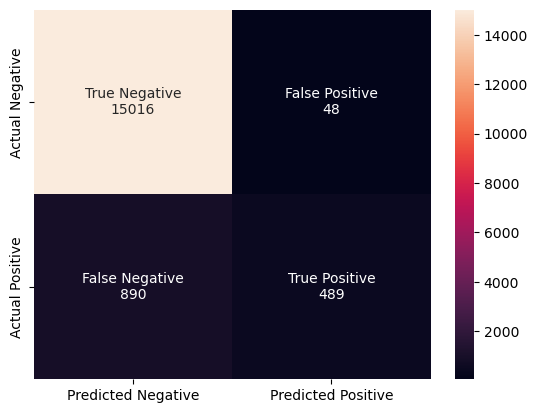

In [120]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in co_mat.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2,2)
axylabels = ['Actual Negative', 'Actual Positive']
axxlabels = ['Predicted Negative', 'Predicted Positive']

# plotting the heatmap
sns.heatmap(co_mat, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

In [121]:
print(classification_report(y_test,y_pred_gbct))
print('F1-Score = ',str(round(f1_score(y_test, y_pred_gbct)*100,1)), '%')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.91      0.35      0.51      1379

    accuracy                           0.94     16443
   macro avg       0.93      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443

F1-Score =  51.0 %


Text(0, 0.5, 'True Positive Rate')

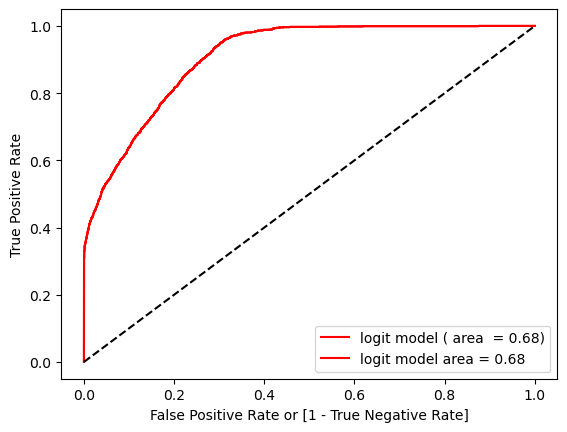

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, grid_search_gbc.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, y_pred_gbct)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot(fpr, tpr, color='red', label='logit model area = %0.2f' % auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

gradient boost give high acuuracy and high f1 score compare to other model thats why prect with gradient boost.

In [123]:
import xgboost

In [124]:
xgbo = xgboost()

TypeError: 'module' object is not callable

### Prediction with gradient boost

In [ ]:
test_df=pd.read_csv('C:\\capstonefile\\test_hr.csv')

In [ ]:
test_df.head()

In [ ]:
test_df.columns

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df.duplicated()

In [ ]:
test_df.describe()

In [ ]:
hr_df.describe(include = 'object')

In [ ]:
test_df['education']=test_df['education'].fillna(test_df['education'].mode()[0])

In [ ]:
test_df['previous_year_rating']=test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].mode()[0])

In [ ]:
hr_test=pd.get_dummies(test_df,columns=['department','education','recruitment_channel','gender'],drop_first=True)

In [ ]:
hr_test.drop(['employee_id','region'],axis=1,inplace=True)

In [ ]:
hr_test.columns

In [ ]:
x_train.columns

In [ ]:
test_df.columns

In [ ]:
predictions=grid_search_gbc.predict(hr_test)

In [ ]:
test_df['is_promoted']=predictions

In [ ]:
test_df.head()

In [ ]:
#test_df.to_csv('hr_prediction.csv')